In [43]:
# Credit - Lazy Programmer Bootcamp
# Project - Classifying MNIST data set using TF & ANN

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [18]:
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
# Building a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
r = model.fit(x_train, y_train,
             validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - accuracy: 0.9043 - val_loss: 0.1394 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1615 - accuracy: 0.9527 - val_loss: 0.1012 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1248 - accuracy: 0.9618 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0843 - val_accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0925 - accuracy: 0.9712 - val_loss: 0.0776 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9737 - val_loss: 0.0766 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0757 - val_accuracy:

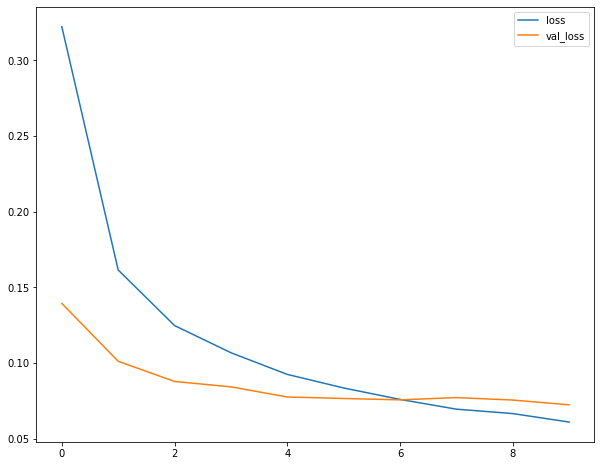

In [25]:
# Plot Loss 
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

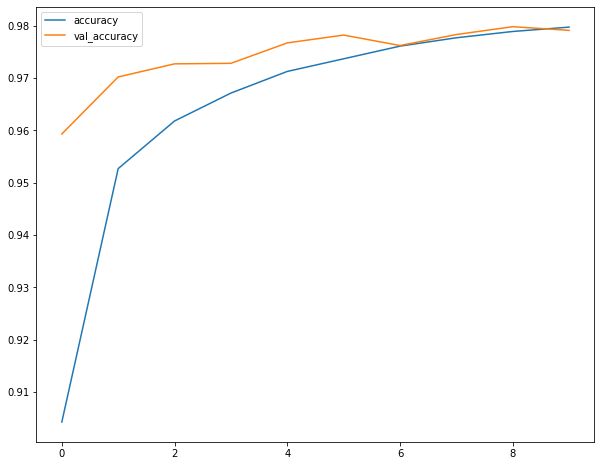

In [26]:
# Plot Accuracy 
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [27]:
# Evaluate model 
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 933us/step - loss: 0.0724 - accuracy: 0.9791


[0.07242439687252045, 0.9790999889373779]

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

In [29]:
p_test = model.predict(x_test).argmax(axis=1)
print(p_test)

[7 2 1 ... 4 5 6]


In [31]:
cm = confusion_matrix(y_test, p_test)
cm

array([[ 971,    0,    0,    2,    0,    2,    2,    0,    2,    1],
       [   0, 1123,    2,    1,    0,    0,    2,    1,    6,    0],
       [   2,    0, 1003,    3,    3,    0,    3,    6,   12,    0],
       [   0,    0,    3,  996,    0,    2,    0,    4,    5,    0],
       [   1,    1,    1,    0,  962,    0,    5,    2,    2,    8],
       [   2,    0,    0,   19,    1,  856,    3,    2,    6,    3],
       [   5,    3,    0,    1,    5,    4,  937,    0,    3,    0],
       [   1,    1,    8,    0,    0,    0,    0, 1007,    2,    9],
       [   2,    0,    1,    5,    3,    5,    1,    4,  950,    3],
       [   1,    4,    0,    6,    3,    2,    0,    4,    3,  986]],
      dtype=int64)

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]

In [38]:
misclassified_idx

array([   8,  115,  149,  151,  247,  259,  321,  340,  381,  445,  447,
        582,  619,  659,  691,  720,  844,  877,  924,  951,  965, 1014,
       1032, 1039, 1082, 1112, 1181, 1182, 1194, 1226, 1232, 1242, 1247,
       1260, 1299, 1319, 1328, 1393, 1403, 1466, 1522, 1530, 1549, 1553,
       1609, 1621, 1681, 1717, 1721, 1737, 1754, 1790, 1800, 1878, 1901,
       1984, 2004, 2016, 2024, 2035, 2043, 2044, 2053, 2070, 2109, 2118,
       2125, 2129, 2130, 2135, 2182, 2185, 2189, 2224, 2272, 2293, 2299,
       2369, 2387, 2406, 2422, 2454, 2462, 2597, 2648, 2654, 2743, 2810,
       2927, 2939, 2953, 2970, 2995, 3073, 3117, 3260, 3289, 3330, 3405,
       3422, 3451, 3503, 3520, 3549, 3558, 3565, 3567, 3597, 3604, 3681,
       3718, 3780, 3808, 3853, 3893, 3902, 3906, 3941, 3943, 4065, 4075,
       4078, 4176, 4199, 4201, 4205, 4224, 4248, 4255, 4271, 4289, 4306,
       4355, 4360, 4497, 4504, 4536, 4571, 4601, 4615, 4761, 4807, 4823,
       4860, 4880, 4956, 5078, 5331, 5457, 5600, 56

Text(0.5, 1.0, 'True Label: 4 Predicted Label: 9')

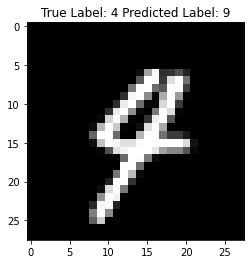

In [40]:
# Randomly picking any misclassified image and showing it against true label
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted Label: %s" % (y_test[i], p_test[i]))

In [42]:
# Thank You